Easy 
Открыть набор данных dota_hero_stats.csv из папки data.
Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и посчитайте количество героев для каждого значения legs

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
    
df = pd.read_csv("C:\\Users\\UserOfPC\\Downloads\\brunoyam-ds-SC372-2560-main\\brunoyam-ds-SC372-2560-main\\data\\dota_hero_stats.csv")
df.describe()
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [168]:
df.groupby(['legs']).count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


Normal
Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик. 

In [169]:
df.groupby(['attack_type', 'primary_attr']).describe()

Unnamed: 0                                           \
                              count       mean        std   min    25%   50%   
attack_type primary_attr                                                       
Melee       agi                19.0  61.315789  38.233279   0.0  34.50  65.0   
            int                 2.0  67.500000  20.506097  53.0  60.25  67.5   
            str                35.0  62.657143  34.265351   1.0  31.50  69.0   
Ranged      agi                18.0  46.111111  32.737618   5.0  15.25  44.5   
            int                40.0  55.225000  32.472069   2.0  28.75  50.5   
            str                 3.0  84.666667  25.774665  57.0  73.00  89.0   

                                          id             ...                 \
                            75%    max count       mean  ...     75%    max   
attack_type primary_attr                                 ...                  
Melee       agi           89.00  114.0  19.0  63.315789  ...   91.00  120.0   
            int           74.75   82.0   2.0  69.500000  ...   76.75   84.0   
            str           95.50  116.0  35.0  64.771429  ...   97.50  129.0   
Ranged      agi           67.75  111.0  18.0  47.777778  ...   69.75  113.0   
            int           78.75  115.0  40.0  57.275000  ...   80.75  121.0   
            str           98.50  108.0   3.0  86.666667  ...  100.50  110.0   

                          legs                                               
                         count      mean       std  min  25%  50%  75%  max  
attack_type primary_attr                                                     
Melee       agi           19.0  2.315789  1.796683  0.0  2.0  2.0  2.0  8.0  
            int            2.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
            str           35.0  2.171429  0.890661  0.0  2.0  2.0  2.0  6.0  
Ranged      agi           18.0  1.444444  1.149026  0.0  0.0  2.0  2.0  4.0  
            int           40.0  2.250000  0.926809  0.0  2.0  2.0  2.0  6.0  
            str            3.0  1.333333  1.154701  0.0  1.0  2.0  2.0  2.0  

[6 rows x 24 columns]

самый распространённый набор характеристик: Ranged, int

Выведите список героев с этим набором характеристик

In [170]:
df[(df['attack_type'] == 'Ranged') & (df['primary_attr'] == 'int')]['localized_name']

2                     Bane
4           Crystal Maiden
12                    Puck
16            Storm Spirit
20              Windranger
21                    Zeus
23                    Lina
24                    Lion
25           Shadow Shaman
28            Witch Doctor
29                    Lich
31                  Enigma
32                  Tinker
34               Necrophos
35                 Warlock
37           Queen of Pain
41           Death Prophet
43                   Pugna
48                  Dazzle
50                 Leshrac
51        Nature's Prophet
56             Enchantress
62                  Jakiro
63                Batrider
64                    Chen
66      Ancient Apparition
72                 Invoker
73                Silencer
74       Outworld Devourer
77            Shadow Demon
84                  Rubick
85               Disruptor
88     Keeper of the Light
90                  Visage
99           Skywrath Mage
103                Techies
109                 Oracle
1

Hard
В колонке roles находится список того, к каким ролям приписывают создатели Dota того или иного героя. Так же у каждого героя есть его основная характеристика, которая записана в колонке primary_attr.

Для каждой роли требуется построить bar plot на котором будет видно какое колличество раз героев с тем или иным основным атрибутам создатели игры относят к данной роли.

Так же требуется сделать обратный график: для каждого основного аттрибута сделайте bar plot на котором будет видно какое колличество раз создатели Dota относили героя с этим атрибутом к конкретной роли.

Сделайте выводы по полученым графикам (это могут быть совершенно любые выводы)

In [171]:
#удаляем ненужные знаки

template = "["
df['roles'] = df['roles'].str.replace(template, '', regex=True)
template2 = "]"
df['roles'] = df['roles'].str.replace(template2, '', regex=True)
template3 = "'"
df['roles'] = df['roles'].str.replace(template3, '', regex=True)
df

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"Carry, Escape, Nuker"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"Initiator, Durable, Disabler, Jungler"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"Support, Disabler, Nuker, Durable"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"Carry, Disabler, Jungler, Nuker, Initiator"
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"Support, Disabler, Nuker, Jungler"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"Carry, Escape, Disabler, Initiator"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"Support, Nuker, Disabler, Escape"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"Carry, Nuker, Disabler, Durable, Escape, Initi..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"Support, Nuker, Disabler, Escape"


In [172]:
#перед тем как применить explode, нужно сделать списки. А еще появился какой то лишний пробел перед именем, реплэйсним его тоже
template4 = " "
df['roles'] = df['roles'].str.replace(template4, '', regex=True)
df['roles'] = df['roles'].apply(lambda x: x.split(',') if pd.notna(x) else x)    
df = df.explode('roles')
df

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,Carry
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,Escape
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,Nuker
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,Initiator
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,Durable
...,...,...,...,...,...,...,...,...
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,Escape
116,116,Melee,129,2,Mars,npc_dota_hero_mars,str,Carry
116,116,Melee,129,2,Mars,npc_dota_hero_mars,str,Initiator
116,116,Melee,129,2,Mars,npc_dota_hero_mars,str,Disabler


Группируем

In [173]:
df1 = df.groupby(['roles', 'primary_attr'])['primary_attr'].count()
df1

roles      primary_attr
Carry      agi             33
           int             12
           str             19
Disabler   agi             20
           int             35
           str             31
Durable    agi             10
           int              5
           str             32
Escape     agi             23
           int             11
           str             13
Initiator  agi             11
           int             12
           str             30
Jungler    agi              3
           int              8
           str              4
Nuker      agi             21
           int             36
           str             27
Pusher     agi             13
           int             12
           str              4
Support    agi              4
           int             27
           str             12
Name: primary_attr, dtype: int64

In [179]:
df2 = df1.reset_index(drop=False)
df2

,level_0,index,primary_attr
0,0,0,33
1,1,1,12
2,2,2,19
3,3,3,20
4,4,4,35
5,5,5,31
6,6,6,10
7,7,7,5
8,8,8,32
9,9,9,23


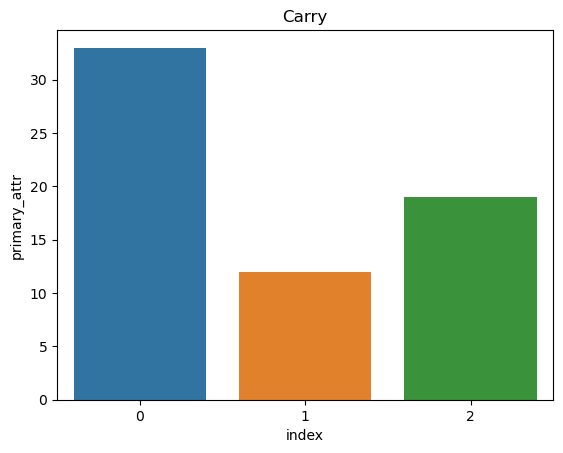

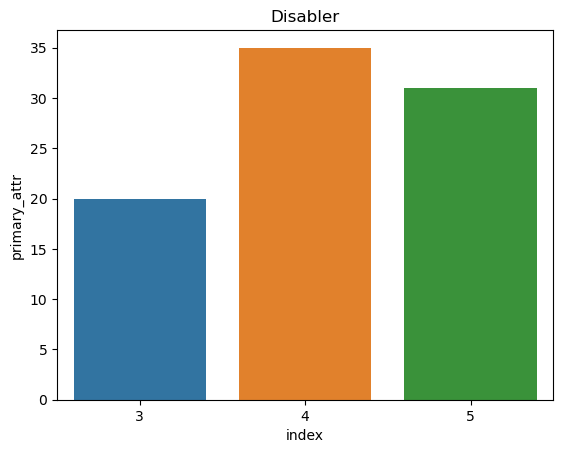

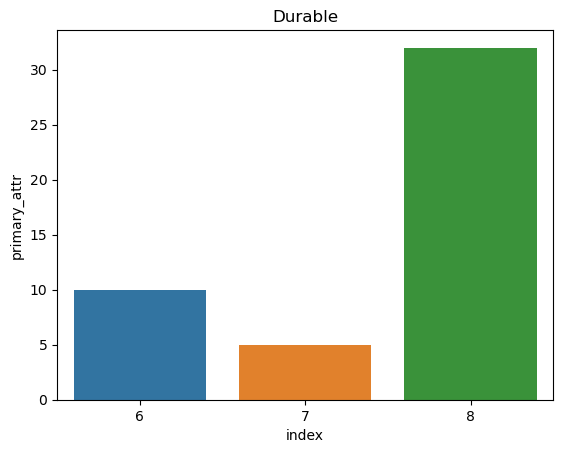

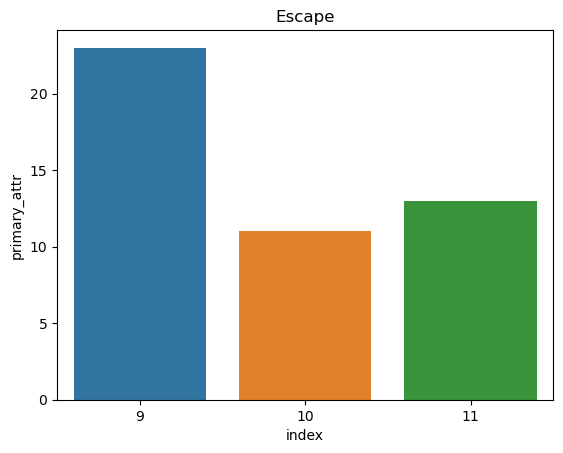

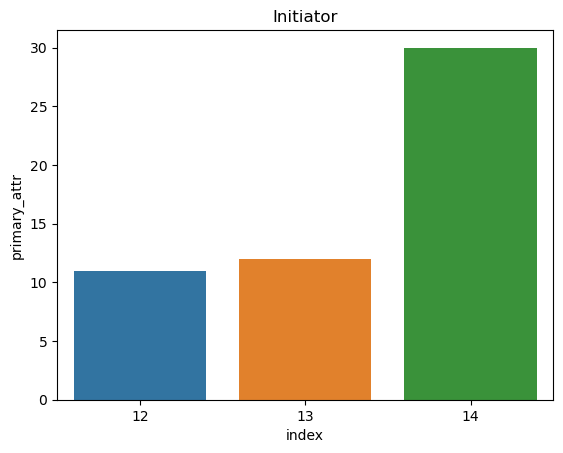

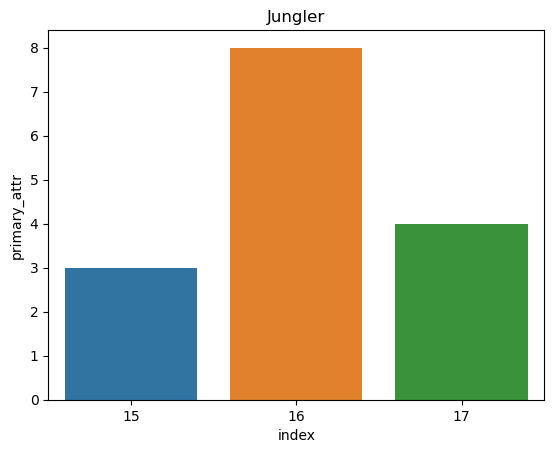

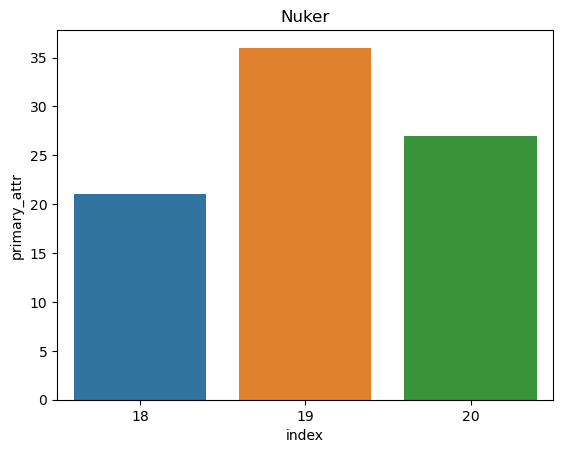

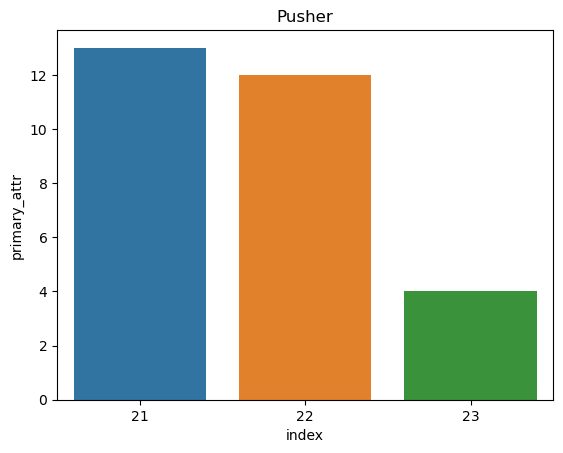

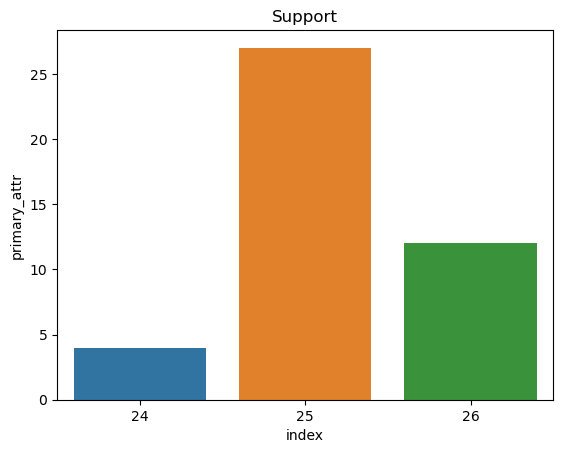

In [191]:
title_list = ["Carry", "Disabler", "Durable", "Escape", "Initiator", "Jungler", "Nuker", "Pusher", "Support"]
count = 0
i = 0
for x in range(3, 28, 3):
    sns.barplot(data=df1[count:x], x = 'index', y = 'primary_attr').set(title=title_list[i])
    count += 3
    i += 1
    plt.show()